In [1]:
import pandas as pd

In [2]:
import statistics

In [3]:
from datetime import datetime

In [2]:
df = pd.read_csv("sf-bay-area-bike-share/trip.csv")

In [5]:
df.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [3]:
import pandasql
from pandasql import *

In [4]:
query = """
SELECT subscription_type, count(*) AS count
FROM df
GROUP BY subscription_type
"""

In [ ]:
s = sqldf(query, globals())

In [308]:
#Convert to datetime so that it can be manipulated more easily
df.start_date = pd.to_datetime(df.start_date, format='%m/%d/%Y %H:%M')

In [309]:
#Extract the year, month, and day from start_date
df['date'] = df.start_date.dt.date

In [310]:
#Each entry in the date feature is a trip. 
#By finding the total number of times a date is listed, we know how many trips were taken on that date.
dates = {}
for d in df.date:
    if d not in dates:
        dates[d] = 1
    else:
        dates[d] += 1

In [311]:
#Create the data frame that will be used for training, with the dictionary we just created.
df2 = pd.DataFrame.from_dict(dates, orient = "index")

In [312]:
df2['date'] = df2.index

In [313]:
df2['trips'] = df2.iloc[:,0]

In [314]:
df2.head()

,0,date,trips
2013-08-29,748,2013-08-29,748
2013-08-30,714,2013-08-30,714
2013-08-31,640,2013-08-31,640
2013-09-01,706,2013-09-01,706
2013-09-02,661,2013-09-02,661


In [315]:
train = pd.DataFrame(df2.date)

In [316]:
train['trips'] = df2['trips']

In [317]:
train.head()

,date,trips
2013-08-29,2013-08-29,748
2013-08-30,2013-08-30,714
2013-08-31,2013-08-31,640
2013-09-01,2013-09-01,706
2013-09-02,2013-09-02,661


In [318]:
train.reset_index(drop = True, inplace = True)

In [319]:
train.head()

,date,trips
0,2013-08-29,748
1,2013-08-30,714
2,2013-08-31,640
3,2013-09-01,706
4,2013-09-02,661


In [320]:
train = train.sort_values(by='date')

In [321]:
train.head()

,date,trips
0,2013-08-29,748
1,2013-08-30,714
2,2013-08-31,640
3,2013-09-01,706
4,2013-09-02,661


In [322]:
train.tail()

,date,trips
372,2015-08-27,1443
371,2015-08-28,1220
370,2015-08-29,342
369,2015-08-30,331
368,2015-08-31,1369


In [323]:
type(train.date[0])

datetime.date

In [324]:
weather = pd.read_csv("sf-bay-area-bike-share/weather.csv")

In [325]:
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107


In [326]:
weather.events.unique()

array([nan, 'Fog', 'Rain', 'Fog-Rain', 'rain', 'Rain-Thunderstorm'],
      dtype=object)

In [327]:
weather.loc[weather["events"] == 'rain', 'events'] = 'Rain'

In [328]:
weather.events.unique()

array([nan, 'Fog', 'Rain', 'Fog-Rain', 'Rain-Thunderstorm'], dtype=object)

In [329]:
weather.loc[weather["events"].isnull(), 'events'] = 'Normal'

In [330]:
weather.events.unique()

array(['Normal', 'Fog', 'Rain', 'Fog-Rain', 'Rain-Thunderstorm'],
      dtype=object)

Checking the zip code based data:

In [331]:
weather.zip_code.unique()

array([94107, 94063, 94301, 94041, 95113], dtype=int64)

In [332]:
for zipcode in (weather.zip_code.unique()):
    print(zipcode)
    print(weather[weather.zip_code == zipcode].isnull().sum())
    print()

94107
date                               0
max_temperature_f                  0
mean_temperature_f                 0
min_temperature_f                  0
max_dew_point_f                    0
mean_dew_point_f                   0
min_dew_point_f                    0
max_humidity                       0
mean_humidity                      0
min_humidity                       0
max_sea_level_pressure_inches      0
mean_sea_level_pressure_inches     0
min_sea_level_pressure_inches      0
max_visibility_miles               0
mean_visibility_miles              0
min_visibility_miles               0
max_wind_Speed_mph                 0
mean_wind_speed_mph                0
max_gust_speed_mph                13
precipitation_inches               0
cloud_cover                        0
events                             0
wind_dir_degrees                   0
zip_code                           0
dtype: int64

94063
date                                0
max_temperature_f                   0
mean_tempe

Data is clean for 94107, 95113
Choosing 94107 - San Francisco as more work carried on for this zip code and it is easier to check.

In [333]:
weather = weather[weather.zip_code == 94107]

In [334]:
weather = weather.drop(['zip_code'], axis=1)

to fill nulls for max_gust speed

In [335]:
weather.max_gust_speed_mph.describe()

count    720.000000
mean      24.197222
std        7.961485
min        6.000000
25%       20.000000
50%       24.000000
75%       28.000000
max       93.000000
Name: max_gust_speed_mph, dtype: float64

In [336]:
weather.corr()

,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,mean_sea_level_pressure_inches,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,cloud_cover,wind_dir_degrees
max_temperature_f,1.000000,0.907018,0.599123,0.585565,0.485000,0.372426,-0.167614,-0.367892,-0.425437,-0.392300,-0.345079,-0.304290,0.065450,0.259442,0.319660,0.040472,0.043484,0.049461,-0.294906,0.352683
mean_temperature_f,0.907018,1.000000,0.878855,0.744692,0.709754,0.631826,-0.119592,-0.146660,-0.140145,-0.548537,-0.496712,-0.444962,0.084117,0.242662,0.267681,0.200515,0.292530,0.172073,0.005758,0.344763
min_temperature_f,0.599123,0.878855,1.000000,0.763253,0.810161,0.787317,-0.035102,0.141349,0.218189,-0.602953,-0.557119,-0.504217,0.090202,0.169074,0.145757,0.334721,0.505902,0.271586,0.351110,0.262218
max_dew_point_f,0.585565,0.744692,0.763253,1.000000,0.937803,0.835197,0.415598,0.433438,0.368626,-0.458493,-0.426837,-0.391414,0.021887,-0.061866,-0.107687,0.125441,0.208353,0.125267,0.305876,0.340164
mean_dew_point_f,0.485000,0.709754,0.810161,0.937803,1.000000,0.958505,0.440609,0.548634,0.517298,-0.514441,-0.474587,-0.430538,0.021682,-0.055872,-0.090789,0.155963,0.289453,0.141173,0.418627,0.338566
min_dew_point_f,0.372426,0.631826,0.787317,0.835197,0.958505,1.000000,0.403131,0.591045,0.599512,-0.515010,-0.471471,-0.424707,0.027232,-0.014430,-0.052347,0.171579,0.343769,0.145318,0.468698,0.297423
max_humidity,-0.167614,-0.119592,-0.035102,0.415598,0.440609,0.403131,1.000000,0.812889,0.567535,-0.035698,-0.044232,-0.052007,-0.074736,-0.410555,-0.469724,-0.051900,-0.080404,-0.010964,0.311396,0.148812
mean_humidity,-0.367892,-0.146660,0.141349,0.433438,0.548634,0.591045,0.812889,1.000000,0.940047,-0.100036,-0.104903,-0.103147,-0.071264,-0.423848,-0.500710,0.032700,0.101429,0.033319,0.607536,0.046938
min_humidity,-0.425437,-0.140145,0.218189,0.368626,0.517298,0.599512,0.567535,0.940047,1.000000,-0.118393,-0.120455,-0.113625,-0.058087,-0.361260,-0.435115,0.079320,0.191904,0.055003,0.677250,-0.019325
max_sea_level_pressure_inches,-0.392300,-0.548537,-0.602953,-0.458493,-0.514441,-0.515010,-0.035698,-0.100036,-0.118393,1.000000,0.981644,0.932755,-0.091711,-0.113153,-0.061578,-0.428145,-0.488336,-0.366643,-0.192339,-0.256942


In [337]:
w1 = weather.loc[:, ('max_wind_Speed_mph', 'max_gust_speed_mph')]

max_wind_Speed_mph and max_gust_speed_mph are correlated

In [338]:
w1.corr()

,max_wind_Speed_mph,max_gust_speed_mph
max_wind_Speed_mph,1.000000,0.788848
max_gust_speed_mph,0.788848,1.000000


In [339]:
w1_null = w1[w1.max_gust_speed_mph.isnull()]

In [340]:
w1_null.head()

,max_wind_Speed_mph,max_gust_speed_mph
46,18.0,NaN
63,14.0,NaN
923,17.0,NaN
932,17.0,NaN
939,18.0,NaN


In [341]:
weather.loc[weather.max_gust_speed_mph.isnull(), 'max_gust_speed_mph'] = weather.max_wind_Speed_mph

In [342]:
weather.max_gust_speed_mph.isnull().sum()

0

In [343]:
weather.iloc[63]

date                              10/31/2013
max_temperature_f                         70
mean_temperature_f                        59
min_temperature_f                         48
max_dew_point_f                           51
mean_dew_point_f                          43
min_dew_point_f                           38
max_humidity                              71
mean_humidity                             54
min_humidity                              37
max_sea_level_pressure_inches          30.19
mean_sea_level_pressure_inches         30.13
min_sea_level_pressure_inches          30.08
max_visibility_miles                      10
mean_visibility_miles                     10
min_visibility_miles                      10
max_wind_Speed_mph                        14
mean_wind_speed_mph                        4
max_gust_speed_mph                        14
precipitation_inches                       0
cloud_cover                                0
events                                Normal
wind_dir_d

In [425]:
for i in weather.precipitation_inches.iloc[0:5]:
    print(type(i))

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>


In [345]:
weather.precipitation_inches = pd.to_numeric(weather.precipitation_inches, errors = 'coerce')

In [347]:
weather.precipitation_inches.describe()

count    663.000000
mean       0.037059
std        0.185614
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.120000
Name: precipitation_inches, dtype: float64

In [348]:
statistics.median(weather[weather.precipitation_inches.notnull()].precipitation_inches)

0.0

In [349]:
weather.precipitation_inches.isnull().sum()

70

In [350]:
weather.loc[weather.precipitation_inches.isnull(), 'precipitation_inches'] = 0.0

In [351]:
weather.precipitation_inches.isnull().sum()

0

In [352]:
weather = weather.sort_values(by = 'date')

In [353]:
weather.reset_index(drop = True, inplace = True)

In [354]:
weather.date.head()

0     1/1/2014
1     1/1/2015
2    1/10/2014
3    1/10/2015
4    1/11/2014
Name: date, dtype: object

Merging weather to train

In [355]:
train = train.merge(weather, on = train.date)

In [356]:
train.head()

,key_0,date_x,trips,date_y,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,...,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees
0,2013-08-29,2013-08-29,748,1/1/2014,56.0,49.0,41.0,45.0,40.0,36.0,...,10.0,9.0,7.0,9.0,1.0,10.0,0.0,3.0,Normal,290.0
1,2013-08-30,2013-08-30,714,1/1/2015,56.0,47.0,38.0,27.0,20.0,14.0,...,10.0,10.0,10.0,23.0,8.0,28.0,0.0,1.0,Normal,40.0
2,2013-08-31,2013-08-31,640,1/10/2014,60.0,54.0,48.0,48.0,46.0,43.0,...,10.0,9.0,6.0,15.0,6.0,17.0,0.0,4.0,Normal,310.0
3,2013-09-01,2013-09-01,706,1/10/2015,60.0,54.0,47.0,52.0,49.0,45.0,...,10.0,7.0,4.0,8.0,3.0,10.0,0.0,6.0,Fog,280.0
4,2013-09-02,2013-09-02,661,1/11/2014,58.0,52.0,46.0,51.0,46.0,42.0,...,10.0,10.0,6.0,18.0,6.0,22.0,0.0,4.0,Normal,281.0


In [357]:
train.drop(['key_0', 'date_y'],1, inplace= True)

In [358]:
train = train.rename(columns={'date_x':'date'})

In [359]:
train.head()

,date,trips,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,...,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees
0,2013-08-29,748,56.0,49.0,41.0,45.0,40.0,36.0,83.0,69.0,...,10.0,9.0,7.0,9.0,1.0,10.0,0.0,3.0,Normal,290.0
1,2013-08-30,714,56.0,47.0,38.0,27.0,20.0,14.0,54.0,37.0,...,10.0,10.0,10.0,23.0,8.0,28.0,0.0,1.0,Normal,40.0
2,2013-08-31,640,60.0,54.0,48.0,48.0,46.0,43.0,89.0,75.0,...,10.0,9.0,6.0,15.0,6.0,17.0,0.0,4.0,Normal,310.0
3,2013-09-01,706,60.0,54.0,47.0,52.0,49.0,45.0,93.0,83.0,...,10.0,7.0,4.0,8.0,3.0,10.0,0.0,6.0,Fog,280.0
4,2013-09-02,661,58.0,52.0,46.0,51.0,46.0,42.0,93.0,83.0,...,10.0,10.0,6.0,18.0,6.0,22.0,0.0,4.0,Normal,281.0


In [360]:
stations = pd.read_csv("sf-bay-area-bike-share/station.csv")

In [361]:
stations.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [362]:
stations.city.unique()

array(['San Jose', 'Redwood City', 'Mountain View', 'Palo Alto',
       'San Francisco'], dtype=object)

In [363]:
stations = stations[stations.city == 'San Francisco']

In [364]:
stations.reset_index(drop = True, inplace = True)

In [365]:
stations.shape

(35, 7)

In [366]:
stations.head()

,id,name,lat,long,dock_count,city,installation_date
0,41,Clay at Battery,37.795001,-122.399970,15,San Francisco,8/19/2013
1,42,Davis at Jackson,37.797280,-122.398436,15,San Francisco,8/19/2013
2,45,Commercial at Montgomery,37.794231,-122.402923,15,San Francisco,8/19/2013
3,46,Washington at Kearney,37.795425,-122.404767,15,San Francisco,8/19/2013
4,47,Post at Kearney,37.788975,-122.403452,19,San Francisco,8/19/2013


In [427]:
for i in stations.installation_date.values[0:5]:
    print(i, type(i))

2013-08-19 <class 'datetime.date'>
2013-08-19 <class 'datetime.date'>
2013-08-19 <class 'datetime.date'>
2013-08-19 <class 'datetime.date'>
2013-08-19 <class 'datetime.date'>


In [368]:
stations.installation_date.shape

(35,)

In [369]:
stations.installation_date = pd.to_datetime(stations.installation_date)

In [370]:
stations.installation_date = stations.installation_date.dt.date

In [428]:
for str in stations.installation_date[0:5]:
    print(type(str))

<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>


In [372]:
print (stations.installation_date.min())
print (stations.installation_date.max())

2013-08-19
2014-01-22


Dock installations have been happening during this period.

In [373]:
#For each day in train.date, find the number of docks (parking spots for individual bikes) that were installed 
#on or before that day.
total_docks = []
for day in train.date:
    total_docks.append(sum(stations[stations.installation_date <= day].dock_count))

In [374]:
train['total_docks'] = total_docks

In [375]:
train.total_docks.unique()

array([650, 665], dtype=int64)

Holidays

In [376]:
from pandas.tseries.holiday import USFederalHolidayCalendar

In [377]:
#Find all of the holidays during out time span
calendar = USFederalHolidayCalendar()
holidays = calendar.holidays(start=train.date.min(), end=train.date.max())

In [378]:
holidays

DatetimeIndex(['2013-09-02', '2013-10-14', '2013-11-11', '2013-11-28',
               '2013-12-25', '2014-01-01', '2014-01-20', '2014-02-17',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13',
               '2014-11-11', '2014-11-27', '2014-12-25', '2015-01-01',
               '2015-01-19', '2015-02-16', '2015-05-25', '2015-07-03'],
              dtype='datetime64[ns]', freq=None)

In [379]:
from pandas.tseries.offsets import CustomBusinessDay

In [380]:
#Find all of the business days in our time span
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
business_days = pd.DatetimeIndex(start=train.date.min(), end=train.date.max(), freq=us_bd)

In [381]:
business_days

DatetimeIndex(['2013-08-29', '2013-08-30', '2013-09-03', '2013-09-04',
               '2013-09-05', '2013-09-06', '2013-09-09', '2013-09-10',
               '2013-09-11', '2013-09-12',
               ...
               '2015-08-18', '2015-08-19', '2015-08-20', '2015-08-21',
               '2015-08-24', '2015-08-25', '2015-08-26', '2015-08-27',
               '2015-08-28', '2015-08-31'],
              dtype='datetime64[ns]', length=503, freq='C')

In [382]:
business_days = pd.to_datetime(business_days, format = '%Y/%m/%d').date

In [383]:
# if train.date is a business day or not
train['business_days'] = train.date.isin(business_days)

In [384]:
train['business_days'].head()

0     True
1     True
2    False
3    False
4    False
Name: business_days, dtype: bool

In [385]:
holidays = pd.to_datetime(holidays, format = '%Y/%m/%d').date

In [386]:
# if train.date is a holiday or not
train['holidays'] = train.date.isin(holidays)

In [387]:
train['holidays'].head()

0    False
1    False
2    False
3    False
4     True
Name: holidays, dtype: bool

In [390]:
weekday = []
for i in train.date:
    wkday = i.weekday()
#    print(wkday)
    if wkday in range(0,5):
        weekday.append(1)
#        print(1)
    else:
        weekday.append(0)
#        print(0)

In [391]:
train['weekday'] = weekday

In [392]:
train.head()

,date,trips,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,...,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,total_docks,business_days,holidays,weekday
0,2013-08-29,748,56.0,49.0,41.0,45.0,40.0,36.0,83.0,69.0,...,1.0,10.0,0.0,3.0,Normal,290.0,650,True,False,1
1,2013-08-30,714,56.0,47.0,38.0,27.0,20.0,14.0,54.0,37.0,...,8.0,28.0,0.0,1.0,Normal,40.0,650,True,False,1
2,2013-08-31,640,60.0,54.0,48.0,48.0,46.0,43.0,89.0,75.0,...,6.0,17.0,0.0,4.0,Normal,310.0,650,False,False,0
3,2013-09-01,706,60.0,54.0,47.0,52.0,49.0,45.0,93.0,83.0,...,3.0,10.0,0.0,6.0,Fog,280.0,650,False,False,0
4,2013-09-02,661,58.0,52.0,46.0,51.0,46.0,42.0,93.0,83.0,...,6.0,22.0,0.0,4.0,Normal,281.0,650,False,True,1


In [393]:
train.business_days = [1 if i is True else 0 for i in train.business_days ]

In [394]:
train.holidays = [1 if i is True else 0 for i in train.holidays ]

In [395]:
train.head()

,date,trips,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,...,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,total_docks,business_days,holidays,weekday
0,2013-08-29,748,56.0,49.0,41.0,45.0,40.0,36.0,83.0,69.0,...,1.0,10.0,0.0,3.0,Normal,290.0,650,1,0,1
1,2013-08-30,714,56.0,47.0,38.0,27.0,20.0,14.0,54.0,37.0,...,8.0,28.0,0.0,1.0,Normal,40.0,650,1,0,1
2,2013-08-31,640,60.0,54.0,48.0,48.0,46.0,43.0,89.0,75.0,...,6.0,17.0,0.0,4.0,Normal,310.0,650,0,0,0
3,2013-09-01,706,60.0,54.0,47.0,52.0,49.0,45.0,93.0,83.0,...,3.0,10.0,0.0,6.0,Fog,280.0,650,0,0,0
4,2013-09-02,661,58.0,52.0,46.0,51.0,46.0,42.0,93.0,83.0,...,6.0,22.0,0.0,4.0,Normal,281.0,650,0,1,1


In [396]:
train['month'] = pd.to_datetime(train.date).dt.month

In [397]:
train.head()

,date,trips,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,...,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,total_docks,business_days,holidays,weekday,month
0,2013-08-29,748,56.0,49.0,41.0,45.0,40.0,36.0,83.0,69.0,...,10.0,0.0,3.0,Normal,290.0,650,1,0,1,8
1,2013-08-30,714,56.0,47.0,38.0,27.0,20.0,14.0,54.0,37.0,...,28.0,0.0,1.0,Normal,40.0,650,1,0,1,8
2,2013-08-31,640,60.0,54.0,48.0,48.0,46.0,43.0,89.0,75.0,...,17.0,0.0,4.0,Normal,310.0,650,0,0,0,8
3,2013-09-01,706,60.0,54.0,47.0,52.0,49.0,45.0,93.0,83.0,...,10.0,0.0,6.0,Fog,280.0,650,0,0,0,9
4,2013-09-02,661,58.0,52.0,46.0,51.0,46.0,42.0,93.0,83.0,...,22.0,0.0,4.0,Normal,281.0,650,0,1,1,9


In [398]:
labels = train.trips

In [399]:
train.drop(['date', 'trips'],1, inplace = True)

In [400]:
train.tail()

,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,...,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,total_docks,business_days,holidays,weekday,month
728,72.0,66.0,60.0,54.0,53.0,45.0,78.0,66.0,53.0,29.92,...,28.0,0.0,3.0,Normal,293.0,665,1,0,1,8
729,74.0,65.0,56.0,58.0,54.0,52.0,86.0,70.0,53.0,29.88,...,31.0,0.0,2.0,Normal,299.0,665,1,0,1,8
730,68.0,64.0,59.0,52.0,51.0,50.0,72.0,64.0,55.0,29.96,...,22.0,0.0,4.0,Normal,272.0,665,0,0,0,8
731,76.0,66.0,55.0,58.0,55.0,52.0,90.0,70.0,50.0,29.82,...,30.0,0.0,1.0,Normal,303.0,665,0,0,0,8
732,72.0,65.0,57.0,56.0,53.0,52.0,87.0,72.0,57.0,30.01,...,21.0,0.0,5.0,Normal,270.0,665,1,0,1,8


Train the model

In [401]:
events = pd.get_dummies(train.events, drop_first = True)

In [402]:
train = train.merge(events, left_index = True, right_index = True)

In [403]:
train.head()

,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,...,wind_dir_degrees,total_docks,business_days,holidays,weekday,month,Fog-Rain,Normal,Rain,Rain-Thunderstorm
0,56.0,49.0,41.0,45.0,40.0,36.0,83.0,69.0,55.0,30.22,...,290.0,650,1,0,1,8,0,1,0,0
1,56.0,47.0,38.0,27.0,20.0,14.0,54.0,37.0,20.0,30.18,...,40.0,650,1,0,1,8,0,1,0,0
2,60.0,54.0,48.0,48.0,46.0,43.0,89.0,75.0,60.0,30.31,...,310.0,650,0,0,0,8,0,1,0,0
3,60.0,54.0,47.0,52.0,49.0,45.0,93.0,83.0,72.0,30.05,...,280.0,650,0,0,0,9,0,0,0,0
4,58.0,52.0,46.0,51.0,46.0,42.0,93.0,83.0,72.0,30.30,...,281.0,650,0,1,1,9,0,1,0,0


In [404]:
train.drop(['events'], axis = 1, inplace=True)

In [405]:
train.head()

,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,...,wind_dir_degrees,total_docks,business_days,holidays,weekday,month,Fog-Rain,Normal,Rain,Rain-Thunderstorm
0,56.0,49.0,41.0,45.0,40.0,36.0,83.0,69.0,55.0,30.22,...,290.0,650,1,0,1,8,0,1,0,0
1,56.0,47.0,38.0,27.0,20.0,14.0,54.0,37.0,20.0,30.18,...,40.0,650,1,0,1,8,0,1,0,0
2,60.0,54.0,48.0,48.0,46.0,43.0,89.0,75.0,60.0,30.31,...,310.0,650,0,0,0,8,0,1,0,0
3,60.0,54.0,47.0,52.0,49.0,45.0,93.0,83.0,72.0,30.05,...,280.0,650,0,0,0,9,0,0,0,0
4,58.0,52.0,46.0,51.0,46.0,42.0,93.0,83.0,72.0,30.30,...,281.0,650,0,1,1,9,0,1,0,0


In [406]:
from sklearn.model_selection import train_test_split

In [407]:
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.2, random_state = 1)

In [206]:
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [272]:
regressor = LinearRegression()

In [275]:
predicted = cross_val_predict(regressor, X_train, y_train, cv=15)

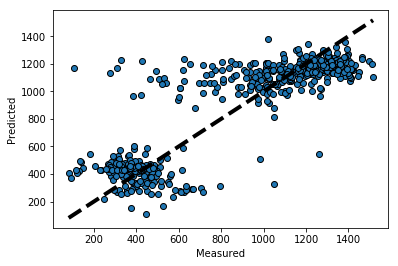

In [276]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors = (0,0,0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [294]:
scoring = ['r2','neg_mean_squared_error','neg_mean_absolute_error']
for i in scoring:
    scores = cross_val_score(regressor, X_train, y_train, cv=15, scoring = i)
#    print(scores)
    if i == 'r2':
        print(i, ': ', scores.mean())
    elif i == 'neg_mean_squared_error':    
        x = -1*scores.mean()
        y = math.sqrt(x) 
        print('RMSE: ', "%0.2f" % y)
    elif i == 'neg_mean_absolute_error':
        x = -1*scores.mean()
        print(i, ": %0.2f (+/- %0.2f)" % (x, scores.std() * 2))   

r2 :  0.7353453130493591
RMSE:  202.50
neg_mean_absolute_error : 146.31 (+/- 31.67)


Does not provide good prediction with Linear model

# Random Forest

In [118]:
from sklearn.ensemble import RandomForestRegressor

In [217]:
rfr = RandomForestRegressor(n_estimators = 55,
                            min_samples_leaf = 3,
                            random_state = 2, bootstrap=False)

In [277]:
predicted = cross_val_predict(rfr, X_train, y_train, cv=15)

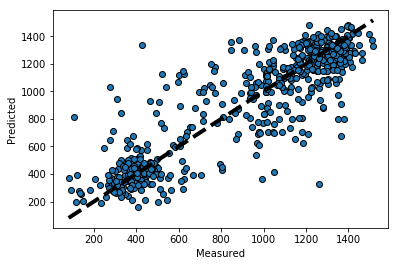

In [278]:
fig,ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors = (0,0,0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [293]:
scoring = ['r2','neg_mean_squared_error','neg_mean_absolute_error']
for i in scoring:
    scores = cross_val_score(rfr, X_train, y_train, cv=15, scoring = i)
#    print(scores)
    if i == 'r2':
        print(i, ': ', scores.mean())
    elif i == 'neg_mean_squared_error':    
        x = -1*scores.mean()
        y = math.sqrt(x) 
        print('RMSE: ', "%0.2f" % y)
    elif i == 'neg_mean_absolute_error':
        x = -1*scores.mean()
        print(i, ": %0.2f (+/- %0.2f)" % (x, scores.std() * 2))   

r2 :  0.7615315265512614
RMSE:  191.96
neg_mean_absolute_error : 132.13 (+/- 27.82)


In [235]:
rfr1 = RandomForestRegressor(n_estimators=60, criterion='mse', random_state=2)

In [280]:
predicted = cross_val_predict(rfr1, X_train, y_train, cv=15)

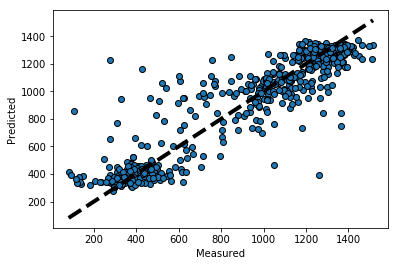

In [281]:
fig,ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors = (0,0,0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [292]:
scoring = ['r2','neg_mean_squared_error','neg_mean_absolute_error']
for i in scoring:
    scores = cross_val_score(rfr1, X_train, y_train, cv=15, scoring = i)
#    print(scores)
    if i == 'r2':
        print(i, ': ', scores.mean())
    elif i == 'neg_mean_squared_error':    
        x = -1*scores.mean()
        y = math.sqrt(x) 
        print('RMSE: ', "%0.2f" % y)
    elif i == 'neg_mean_absolute_error':
        x = -1*scores.mean()
        print(i, ": %0.2f (+/- %0.2f)" % (x, scores.std() * 2))   

r2 :  0.842963044947498
RMSE:  155.81
neg_mean_absolute_error : 105.08 (+/- 28.14)


Knn Regressor:

In [284]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

In [285]:
scoring = ['r2','neg_mean_squared_error','neg_mean_absolute_error']
for i in scoring:
    scores = cross_val_score(neigh, X_train, y_train, cv=15, scoring = i)
#    print(scores)
    if i == 'r2':
        print(i, ': ', scores.mean())
    elif i == 'neg_mean_squared_error':    
        x = -1*scores.mean()
        y = math.sqrt(x) 
        print('RMSE: ', "%0.2f" % y)
    elif i == 'neg_mean_absolute_error':
        x = -1*scores.mean()
        print(i, ": %0.2f (+/- %0.2f)" % (x, scores.std() * 2))   

r2 :  -0.7088811267438663
RMSE:  neg_mean_squared_error : 516.06
neg_mean_absolute_error : 424.58 (+/- 82.99)


In [287]:
neigh1 = KNeighborsRegressor(n_neighbors=3)
neigh1.fit(X_train, y_train) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [288]:
scoring = ['r2','neg_mean_squared_error','neg_mean_absolute_error']
for i in scoring:
    scores = cross_val_score(neigh1, X_train, y_train, cv=15, scoring = i)
#    print(scores)
    if i == 'r2':
        print(i, ': ', scores.mean())
    elif i == 'neg_mean_squared_error':    
        x = -1*scores.mean()
        y = math.sqrt(x) 
        print('RMSE: ', "%0.2f" % y)
    elif i == 'neg_mean_absolute_error':
        x = -1*scores.mean()
        print(i, ": %0.2f (+/- %0.2f)" % (x, scores.std() * 2))   

r2 :  -0.5227020000440755
RMSE:  neg_mean_squared_error : 487.33
neg_mean_absolute_error : 412.57 (+/- 71.51)


Knn Regressor not predicting well

Gradient Boosting Regressor

In [239]:
from sklearn.ensemble import GradientBoostingRegressor

In [240]:
gbr = GradientBoostingRegressor(learning_rate = 0.12,
                                n_estimators = 150,
                                max_depth = 8,
                                min_samples_leaf = 1,
                                random_state = 2)

In [291]:
scoring = ['r2','neg_mean_squared_error','neg_mean_absolute_error']
for i in scoring:
    scores = cross_val_score(gbr, X_train, y_train, cv=15, scoring = i)
#    print(scores)
    if i == 'r2':
        print(i, ': ', scores.mean())
    elif i == 'neg_mean_squared_error':    
        x = -1*scores.mean()
        y = math.sqrt(x) 
        print('RMSE: ', "%0.2f" % y)
    elif i == 'neg_mean_absolute_error':
        x = -1*scores.mean()
        print(i, ": %0.2f (+/- %0.2f)" % (x, scores.std() * 2))   

r2 :  0.7993544716660546
RMSE:  176.35
neg_mean_absolute_error : 115.88 (+/- 29.64)


In [248]:
from sklearn.tree import DecisionTreeRegressor

In [249]:
dtr = DecisionTreeRegressor(min_samples_leaf = 3,
                            max_depth = 8,
                            random_state = 2)

In [290]:
scoring = ['r2','neg_mean_squared_error','neg_mean_absolute_error']
for i in scoring:
    scores = cross_val_score(dtr, X_train, y_train, cv=15, scoring = i)
#    print(scores)
    if i == 'r2':
        print(i, ': ', scores.mean())
    elif i == 'neg_mean_squared_error':    
        x = -1*scores.mean()
        y = math.sqrt(x) 
        print('RMSE: ', "%0.2f" % y)
    elif i == 'neg_mean_absolute_error':
        x = -1*scores.mean()
        print(i, ": %0.2f (+/- %0.2f)" % (x, scores.std() * 2))

r2 :  0.7708013748893999
RMSE:  187.82
neg_mean_absolute_error : 124.78 (+/- 28.69)


In [261]:
from sklearn.ensemble import AdaBoostRegressor

In [262]:
abr = AdaBoostRegressor(n_estimators = 100,
                        learning_rate = 0.1,
                        loss = 'linear',
                        random_state = 2)


In [289]:
scoring = ['r2','neg_mean_squared_error','neg_mean_absolute_error']
for i in scoring:
    scores = cross_val_score(abr, X_train, y_train, cv=15, scoring = i)
#    print(scores)
    if i == 'r2':
        print(i, ': ', scores.mean())
    elif i == 'neg_mean_squared_error':    
        x = -1*scores.mean()
        y = math.sqrt(x) 
        print('RMSE: ', "%0.2f" % y)
    elif i == 'neg_mean_absolute_error':
        x = -1*scores.mean()
        print(i, ": %0.2f (+/- %0.2f)" % (x, scores.std() * 2))     

r2 :  0.8029860904336908
RMSE:  : 174.65
neg_mean_absolute_error : 124.49 (+/- 31.38)


# High r2_score models:
rfr1 - r2: 0.842963044947498, RMSE: 155.81, neg_mean_absolute_error : 105.08 (+/- 28.14)              
abr  - r2: 0.8029860904336908, RMSE: 174.65, neg_mean_absolute_error : 124.49 (+/- 31.38)             
gbr  - r2: 0.7993544716660546, RMSE: 176.35, neg_mean_absolute_error : 115.88 (+/- 29.64)             
rfr  - r2: 0.7615315265512614, RMSE: 191.96, neg_mean_absolute_error : 132.13 (+/- 27.82)

The best model is rfr1.
Predicting the number of trips with this model.

In [299]:
rfr1.fit(X_train, y_train )
predicted = rfr1.predict(X_test)

In [419]:
scoring = ['r2','neg_mean_squared_error','neg_mean_absolute_error']
for i in scoring:
    scores = cross_val_score(rfr2, X_train, y_train, cv=15, scoring = i)
#    print(scores)
    if i == 'r2':
        print(i, ': ', scores.mean())
    elif i == 'neg_mean_squared_error':    
        x = -1*scores.mean()
        y = math.sqrt(x) 
        print('RMSE: ', "%0.2f" % y)
    elif i == 'neg_mean_absolute_error':
        x = -1*scores.mean()
        print(i, ": %0.2f (+/- %0.2f)" % (x, scores.std() * 2))     

r2 :  0.8402185932443318
RMSE:  : 157.12
neg_mean_absolute_error : 105.88 (+/- 29.75)


In [297]:
labels.describe()

count     733.000000
mean      913.995907
std       402.875099
min        81.000000
25%       451.000000
50%      1046.000000
75%      1266.000000
max      1516.000000
Name: trips, dtype: float64

In [298]:
y_test.reset_index(drop = True, inplace = True)

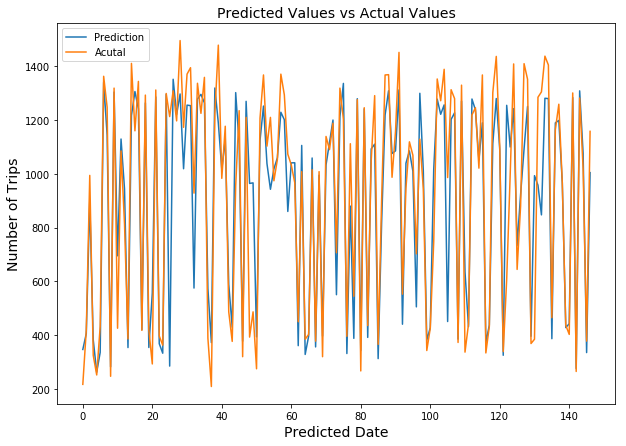

In [301]:
plt.figure(figsize=(10,7))
plt.plot(predicted)
plt.plot(y_test)
plt.legend(['Prediction', 'Acutal'])
plt.ylabel("Number of Trips", fontsize = 14)
plt.xlabel("Predicted Date", fontsize = 14)
plt.title("Predicted Values vs Actual Values", fontsize = 14)
plt.show()